In [1]:
import sys 
sys.path.append('..')

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a_classified = pd.read_excel('../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')

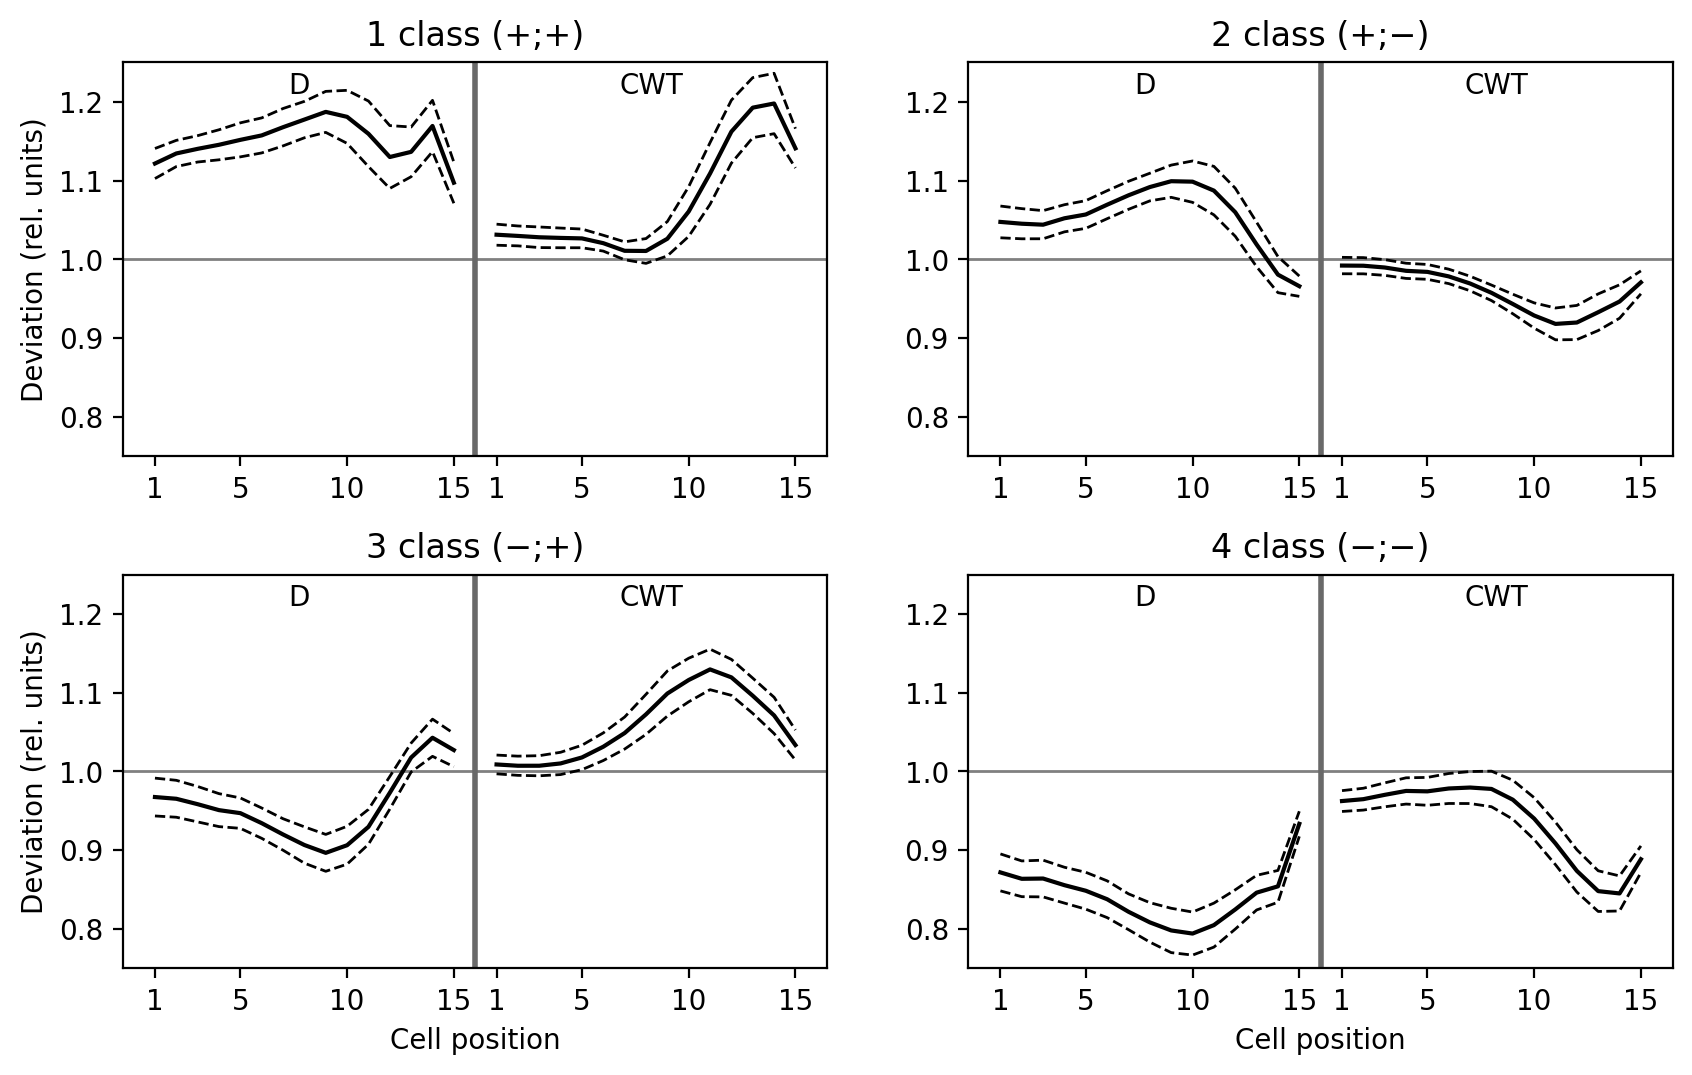

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6), dpi=200)
plt.subplots_adjust(hspace=0.3)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i]

    ax[int(i>1), i%2].axhline(y=1, c='grey', linewidth=1)
    ax[int(i>1), i%2].axvline(x=16, c='dimgrey', linewidth=2 )

    d_mean = np.array(selected.mean()[1:16])
    d_conf_interfal = 1.96* np.array(selected.std()[1:16])/ (len(selected)**0.5)
    ax[int(i>1), i%2].plot(range(1,16), d_mean + d_conf_interfal, c='k', linestyle='--', linewidth=1)
    ax[int(i>1), i%2].plot(range(1,16), d_mean - d_conf_interfal, c='k', linestyle='--', linewidth=1)
    ax[int(i>1), i%2].plot(range(1,16), d_mean, c='k')

    cwt_mean = np.array(selected.mean()[16:31])
    cwt_conf_interfal = 1.96* np.array(selected.std()[16:31])/ (len(selected)**0.5)
    ax[int(i>1), i%2].plot(range(17,32), cwt_mean + cwt_conf_interfal, c='k', linestyle='--', linewidth=1)
    ax[int(i>1), i%2].plot(range(17,32), cwt_mean - cwt_conf_interfal, c='k', linestyle='--', linewidth=1)
    ax[int(i>1), i%2].plot(range(17,32), cwt_mean, c='k')

    ax[int(i>1), i%2].set_ylim([0.75, 1.25])
    ax[int(i>1), i%2].set_xticks([1, 5, 10, 15, 17, 21, 26, 31])
    ax[int(i>1), i%2].set_xticklabels([1, 5, 10, 15, 1, 5, 10, 15])
    ax[int(i>1), i%2].set_title(f"{i+1} class ({'−' if int(i>1) else '+'};{'−' if i%2 else '+'})")
    ax[int(i>1), i%2].text(0.25, 0.94, 'D', horizontalalignment='center', verticalalignment='center', transform=ax[int(i>1), i%2].transAxes)
    ax[int(i>1), i%2].text(0.75, 0.94, 'CWT', horizontalalignment='center', verticalalignment='center', transform=ax[int(i>1), i%2].transAxes)



ax[0, 0].set_ylabel("Deviation (rel. units)")
ax[1, 0].set_ylabel("Deviation (rel. units)")
ax[1, 0].set_xlabel("Cell position")
ax[1, 1].set_xlabel("Cell position")
plt.savefig(f'../output/All Classes (d&cwt)', dpi=300)
plt.show()